In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import streamlit as st
from sklearn.ensemble import RandomForestRegressor 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df1=pd.read_csv('/Apparel_Parameters1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df2=pd.read_csv('/content/Monthly_Retail_Clothing.csv')

In [126]:
df1=pd.read_csv('/Apparel_Parameters.csv')

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     340 non-null    object 
 1   Export_Price_index       340 non-null    float64
 2   Import_Price_Index       340 non-null    float64
 3   Consumer_Price_Index     340 non-null    float64
 4   Employees                340 non-null    float64
 5   Industrial_Production    340 non-null    float64
 6   Material_Supply_Textile  340 non-null    int64  
 7   Retail_Sales             340 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 21.4+ KB


In [128]:
df1.head()

,Date,Export_Price_index,Import_Price_Index,Consumer_Price_Index,Employees,Industrial_Production,Material_Supply_Textile,Retail_Sales
0,1993-01-01,95.9,96.4,132.8,1257.2,194.9029,1401,10581
1,1993-02-01,96.4,96.4,134.0,1266.3,192.5071,1439,10150
2,1993-03-01,97.5,96.5,134.0,1258.1,187.7851,1336,9916
3,1993-04-01,98.5,96.8,134.0,1259.5,193.1045,1323,10257
4,1993-05-01,98.0,96.7,133.5,1263.7,195.7700,1307,10386


In [129]:
df1

,Date,Export_Price_index,Import_Price_Index,Consumer_Price_Index,Employees,Industrial_Production,Material_Supply_Textile,Retail_Sales
0,1993-01-01,95.9,96.4,132.800,1257.2,194.9029,1401,10581
1,1993-02-01,96.4,96.4,134.000,1266.3,192.5071,1439,10150
2,1993-03-01,97.5,96.5,134.000,1258.1,187.7851,1336,9916
3,1993-04-01,98.5,96.8,134.000,1259.5,193.1045,1323,10257
4,1993-05-01,98.0,96.7,133.500,1263.7,195.7700,1307,10386
...,...,...,...,...,...,...,...,...
335,2020-12-01,119.7,104.7,117.577,978.4,92.7962,1180,19057
336,2021-01-01,122.2,105.1,120.178,993.2,93.9334,1183,21014
337,2021-02-01,124.7,105.1,119.287,965.1,93.9991,1181,20180
338,2021-03-01,126.0,105.3,118.949,987.0,96.4748,1202,24759


In [130]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Year'] = pd.to_datetime(df1['Date']).dt.year



In [131]:
df1.corr()

,Export_Price_index,Import_Price_Index,Consumer_Price_Index,Employees,Industrial_Production,Material_Supply_Textile,Retail_Sales,Month,Year
Export_Price_index,1.000000,0.733348,-0.050077,-0.014495,-0.676165,-0.496237,0.585049,-0.034172,0.619256
Import_Price_Index,0.733348,1.000000,-0.281847,-0.046626,-0.776525,-0.565816,0.767001,0.016773,0.847857
Consumer_Price_Index,-0.050077,-0.281847,1.000000,-0.172603,0.552233,0.547593,-0.492902,-0.022440,-0.566447
Employees,-0.014495,-0.046626,-0.172603,1.000000,-0.099037,-0.202153,0.387112,0.024884,0.043725
Industrial_Production,-0.676165,-0.776525,0.552233,-0.099037,1.000000,0.794264,-0.846638,-0.005712,-0.936983
Material_Supply_Textile,-0.496237,-0.565816,0.547593,-0.202153,0.794264,1.000000,-0.693793,-0.002009,-0.718295
Retail_Sales,0.585049,0.767001,-0.492902,0.387112,-0.846638,-0.693793,1.000000,0.022229,0.899917
Month,-0.034172,0.016773,-0.022440,0.024884,-0.005712,-0.002009,0.022229,1.000000,-0.023817
Year,0.619256,0.847857,-0.566447,0.043725,-0.936983,-0.718295,0.899917,-0.023817,1.000000


In [85]:
df2.info()

NameError: ignored

In [86]:
#train_test_split

In [132]:
X=df1.drop(['Date','Retail_Sales'],axis=1)
Y=df1['Retail_Sales']
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.25)

In [88]:
#Standar Scaler

In [133]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [134]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state=0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [135]:
Y_pred = regressor.predict(np.array(X_test))

In [136]:
X_ = sc.fit_transform(X)
regressor.fit(X_, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

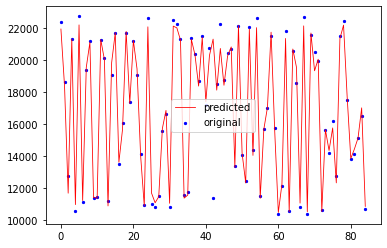

In [137]:
x_ax = range(len(X_test))
plt.scatter(x_ax, Y_test, s=5, color='blue', label='original')
plt.plot(x_ax, Y_pred, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()

In [138]:
X_test1=pd.read_csv('/predict1.csv')
X_test1.head()

,Date,Export_Price_index,Import_Price_Index,Consumer_Price_Index,Employees,Industrial_Production,Material_Supply_Textile
0,2021-05-01,122.2,105.1,120.178,993.2,93.9334,1183
1,2021-06-01,121.2,104.1,118.178,990.2,90.9334,1099
2,2021-07-01,122.2,103.1,115.178,990.7,92.9124,1100
3,2021-08-01,121.2,106.1,119.178,993.2,95.9334,1134
4,2021-09-01,124.2,107.1,122.178,997.2,96.9334,1159


In [139]:
X_test1['Date'] = pd.to_datetime(X_test1['Date'])
X_test1['Month'] = pd.to_datetime(X_test1['Date']).dt.month
X_test1['Year'] = pd.to_datetime(X_test1['Date']).dt.year

In [140]:
X_try=X_test1.drop(['Date'],axis=1)

In [141]:
X_try


,Export_Price_index,Import_Price_Index,Consumer_Price_Index,Employees,Industrial_Production,Material_Supply_Textile,Month,Year
0,122.2,105.10,120.178,993.20,93.9334,1183,5,2021
1,121.2,104.10,118.178,990.20,90.9334,1099,6,2021
2,122.2,103.10,115.178,990.70,92.9124,1100,7,2021
3,121.2,106.10,119.178,993.20,95.9334,1134,8,2021
4,124.2,107.10,122.178,997.20,96.9334,1159,9,2021
5,126.2,111.10,125.178,999.20,97.6734,1178,10,2021
6,127.2,111.76,125.987,999.56,98.6734,1182,11,2021
7,129.2,112.10,127.178,1000.20,99.9334,1190,12,2021
8,130.2,113.10,128.178,1001.20,101.9334,1191,1,2022
9,131.2,114.10,129.178,1002.20,102.9334,1192,2,2022


In [142]:
X_test1['Date']=pd.to_datetime(X_test1['Date'])
X_try_1=X_test1['Date']


In [143]:
X_try=sc.transform(X_try)

In [144]:
X_try.shape


(18, 8)

In [145]:
ypred_new=regressor.predict(np.array(X_try))

In [146]:
try1=[122.4,105.6,113,1024,98.97,1297,9,2021]
regressor.predict(np.array(try1).reshape(1,-1))

array([22534.45])

In [147]:
print(ypred_new)

[21302.24 20890.09 20278.64 22372.66 20942.14 22266.26 22303.51 22401.84
 22406.99 22418.54 22420.23 22382.97 22439.67 22541.82 22446.24 22625.14
 22635.52 22661.63]


In [159]:
ypred_new11=regressor.predict(X_try)
print(ypred_new11)

[21302.24 20890.09 20278.64 22372.66 20942.14 22266.26 22303.51 22401.84
 22406.99 22418.54 22420.23 22382.97 22439.67 22541.82 22446.24 22625.14
 22635.52 22661.63]


In [149]:
print(np.array(Y[317:]),ypred_new11)

[22255 22407 22278 22249 22153 22036 22655 22508 22135 11362  3013  8440
 16857 17306 17792 20526 19779 18573 19057 21014 20180 24759 23497] [21302.24 20890.09 20278.64 22372.66 20942.14 22266.26 22303.51 22401.84
 22406.99 22418.54 22420.23 22382.97 22439.67 22541.82 22446.24 22625.14
 22635.52 22661.63]


In [150]:
ypred_new

array([21302.24, 20890.09, 20278.64, 22372.66, 20942.14, 22266.26,
       22303.51, 22401.84, 22406.99, 22418.54, 22420.23, 22382.97,
       22439.67, 22541.82, 22446.24, 22625.14, 22635.52, 22661.63])

In [151]:
Y[306:]

306    22686
307    22168
308    22269
309    22643
310    22758
311    22223
312    22068
313    21970
314    22338
315    22245
316    22150
317    22255
318    22407
319    22278
320    22249
321    22153
322    22036
323    22655
324    22508
325    22135
326    11362
327     3013
328     8440
329    16857
330    17306
331    17792
332    20526
333    19779
334    18573
335    19057
336    21014
337    20180
338    24759
339    23497
Name: Retail_Sales, dtype: int64

ValueError: ignored

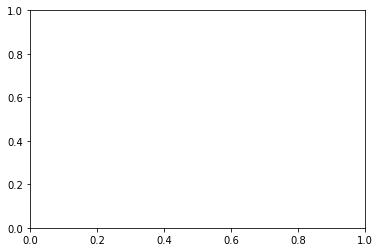

In [152]:
x_ax = range(len(X_try))
plt.scatter(x_ax, Y[307:-1], s=5, color='blue', label='original')
plt.plot(x_ax, ypred_new, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, Y_train)
ypred = model.predict(X_try)
ypred1 = model.predict(X_test)

In [ ]:
x_ax = range(len(X_try))
plt.scatter(x_ax, Y[318:-1], s=5, color='blue', label='original')
plt.plot(x_ax, ypred, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()

ValueError: ignored

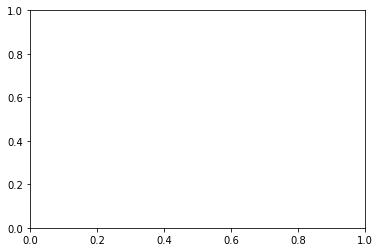

In [160]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model1=reg.fit(X_train,Y_train)
y_pred=model1.predict(X_try)
y_pred1=model1.predict(X_test)
x_ax = range(len(X_try))
plt.scatter(x_ax, Y[318:-1], s=5, color='blue', label='original')
plt.plot(x_ax, y_pred, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor

In [154]:
sgd=SGDRegressor()
br=BayesianRidge()
ll=LassoLars()
ard=ARDRegression()
par=PassiveAggressiveRegressor()
tsr=TheilSenRegressor()

sgd.fit(X_train, Y_train)
br.fit(X_train, Y_train)
pred_y=sgd.predict(X_test)
pred_y1=br.predict(X_test)
ll.fit(X_train, Y_train)
pred_y2=ll.predict(X_test)
ard.fit(X_train,Y_train)
pred_y3=ard.predict(X_test)
par.fit(X_train, Y_train)
pred_y4=par.predict(X_test)
tsr.fit(X_train, Y_train)
pred_y5=tsr.predict(X_test)


mse2 = mean_squared_error(Y_test, pred_y)
score2 = sgd.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score2, mse2, np.sqrt(mse2)))
mse3 = mean_squared_error(Y_test, pred_y1)
score3 = br.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score3, mse3, np.sqrt(mse3)))
mse4 = mean_squared_error(Y_test, pred_y2)
score4 = ll.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score4, mse4, np.sqrt(mse4)))
mse5 = mean_squared_error(Y_test, pred_y3)
score5 = ard.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score5, mse5, np.sqrt(mse5)))
mse6 = mean_squared_error(Y_test, pred_y4)
score6 = par.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score6, mse6, np.sqrt(mse6)))
mse7 = mean_squared_error(Y_test, pred_y5)
score7 = tsr.score(X_test, Y_test)
print("R2:{0:.4f}, MSE:{1:.4f}, RMSE:{2:.4f}"
      .format(score7, mse7, np.sqrt(mse7)))



R2:0.9226, MSE:1454410.4223, RMSE:1205.9894
R2:0.9215, MSE:1474532.7810, RMSE:1214.3034
R2:0.9227, MSE:1451418.5525, RMSE:1204.7483
R2:0.9208, MSE:1487138.2716, RMSE:1219.4828
R2:0.9257, MSE:1396043.6120, RMSE:1181.5429
R2:0.9242, MSE:1424536.4776, RMSE:1193.5395


In [161]:
mse = mean_squared_error(Y_test, Y_pred)
score = regressor.score(X_test, Y_test)
mae = mean_absolute_error(Y_test,Y_pred)
print("R2:{0:.4f}, MSE:{1:.4f}, MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score, mse, mae,np.sqrt(mse)))
mse8 = mean_squared_error(Y_test, ypred1)
score1 = model.score(X_test, Y_test)
mae1 = mean_absolute_error(Y_test, ypred1)
print("R2:{0:.4f}, MSE:{1:.4f},MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score1, mse8, mae1,np.sqrt(mse8)))
mse9 = mean_squared_error(Y_test, y_pred1)
score9 = model1.score(X_test, Y_test)
mae2 = mean_absolute_error(Y_test, y_pred1)
print("R2:{0:.4f}, MSE:{1:.4f}, MAE:{2:.4f},RMSE:{3:.4f}"
      .format(score9, mse9, mae2,np.sqrt(mse2)))

R2:0.9393, MSE:1307503.9370, MAE:369.8694,RMSE:1143.4614
R2:0.9199, MSE:30227016.8036,MAE:4377.4621,RMSE:5497.9102
R2:0.9211, MSE:1482087.2205, MAE:507.0833,RMSE:1205.9894


In [162]:
MSE_=[mse,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9]
R2_=[score,score2,score3,score4,score5,score6,score7,score1,score9]
Algorithm_=['Random Forest Regressor','SGD Regressor','Bayesian Ridge','Lasso Lars','ARD Regression','Passive Aggressive Regressor',
'TheilSen Regressor','ElasticNet CV','Linear Regression']
acc_t=pd.DataFrame()
acc_t['ALgorithm_']=Algorithm_
acc_t['MSE_']=MSE_
acc_t['R2_']=R2_
acc_t.sort_values(by='MSE_')

,ALgorithm_,MSE_,R2_
0,Random Forest Regressor,1.307504e+06,0.939266
5,Passive Aggressive Regressor,1.396044e+06,0.925670
6,TheilSen Regressor,1.424536e+06,0.924153
3,Lasso Lars,1.451419e+06,0.922722
1,SGD Regressor,1.454410e+06,0.922563
2,Bayesian Ridge,1.474533e+06,0.921491
8,Linear Regression,1.482087e+06,0.921089
4,ARD Regression,1.487138e+06,0.920820
7,ElasticNet CV,3.022702e+07,0.919884


In [174]:
acc_t.to_csv('/algo.csv')

In [122]:
X_try=pd.DataFrame(X_try)
X_try['Retail_sales_predict']=ypred_new11

In [123]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Retail_Sales'], name="Daily Recovered"),secondary_y=False)

figd.update_layout(title_text="Retail Sales of Apparel Sector")

figd.update_xaxes(title_text="Date")

figd.update_yaxes(title_text="Retail Sales(in Billion US Dollars)", secondary_y=False)

figd.show()

In [163]:
figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=X_test1['Date'], y=ypred_new, name="Daily Recovered"),secondary_y=False)

figd.update_layout(title_text="Retail Sales of Apparel Sector")

figd.update_xaxes(title_text="Date")

figd.update_yaxes(title_text="Retail Sales(in Billion US Dollars)", secondary_y=False)

figd.show()

In [ ]:
#plot Retail Sales vs Date(monthly) using plotly
#Show prediction for next 18 months
#recommendation

In [125]:
def standard_scaler(X_pred,X):
  sc = StandardScaler()
  X_ = sc.fit_transform(X)
  X_pred=sc.transform(X_pred)
  return X_,X_pred


In [72]:
def model_ml_apparel(X_,Y,X_pred,model):
  reg=model
  model1=reg.fit(X_,Y)
  y_pred=model1.predict(X_pred)
  X_pred=pd.DataFrame(X_pred)
  print(type(X_pred))
  X_pred['Retail_Sales']=y_pred
  return X_pred

In [73]:
def plot_graph_data_apparel(A,B,C,D):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=A, y=B, name="Retail Sales of Apparel"),secondary_y=False)

  figd.update_layout(title_text=C)

  figd.update_xaxes(title_text=D)

  figd.update_yaxes(title_text=C, secondary_y=False)
  figd.show()
  #return(figd)
  

In [170]:
def data_apparel():
  df1=pd.read_csv('/Apparel_Parameters.csv')
  df1['Date']=pd.to_datetime(df1['Date'])
  df1['Date']=pd.to_datetime(df1['Date'])
  df1['Month'] = pd.to_datetime(df1['Date']).dt.month
  df1['Year'] = pd.to_datetime(df1['Date']).dt.year
  X_test1=pd.read_csv('/predict1.csv')
  X_test1['Date'] = pd.to_datetime(X_test1['Date'])
  X_test1['Month'] = pd.to_datetime(X_test1['Date']).dt.month
  X_test1['Year'] = pd.to_datetime(X_test1['Date']).dt.year
  X_pred=pd.DataFrame(X_test1.copy())
  X_pred_=X_test1.groupby('Date').sum().reset_index()
  X_pred.drop(['Date'],axis=1,inplace=True)
  X=df1.drop(['Date','Retail_Sales'],axis=1)
  Y=df1['Retail_Sales']
  return df1,X_pred_,X_pred,X,Y

def standard_scaler(X_pred,X):
  sc = StandardScaler()
  X_ = sc.fit_transform(X)
  X_pred=sc.transform(X_pred)
  return X_,X_pred

def model_ml_apparel(X_,Y,X_pred,model):
  reg=model
  model1=reg.fit(X_,Y)
  y_pred=model1.predict(X_pred)
  X_pred=pd.DataFrame(X_pred)
  print(type(X_pred))
  X_pred['Retail_Sales']=y_pred
  return X_pred

def plot_graph_data_apparel(A,B,C,D):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=A, y=B, name="Retail Sales of Apparel"),secondary_y=False)

  figd.update_layout(title_text=C)

  figd.update_xaxes(title_text=D)

  figd.update_yaxes(title_text=C, secondary_y=False)
  figd.show()
  #return(figd)
  


In [171]:
def main():
  df1,X_pred_,X_pred,X,Y=data_apparel()
  print(type(X_pred))
  X_,X_pred=standard_scaler(X_pred,X)
  print(type(X_pred)) 
  X_pred_f=pd.DataFrame()
  X_pred_f=model_ml_apparel(X_,Y,X_pred,RandomForestRegressor(n_estimators = 1000, random_state = 0))
  #X_pred_f['Retail_Sales']=int(y_pred_f)
  #X_pred_f=X_pred_f.groupby(X_pred_['Date']).sum().reset_index
  sales_f=df1.copy()
  sales_f=sales_f.drop(['Export_Price_index','Import_Price_Index','Consumer_Price_Index','Employees','Industrial_Production','Material_Supply_Textile','Month','Year'],axis=1)
  for_sales=pd.DataFrame(X_pred_['Date'])
  for_sales['Retail_Sales']=X_pred_f['Retail_Sales']
  sales_f=sales_f.append(for_sales)
  #sales_f['Date']=sales_f.append(X_pred_f['Retail_Sales'])
  print(for_sales.info())
  plot_graph_data_apparel(sales_f['Date'],sales_f['Retail_Sales'],'Apparel_Sales_Predicted+History','Date')
  plot_graph_data_apparel(df1['Date'],df1['Retail_Sales'],'Retail_Sales','Date')
  plot_graph_data_apparel(X_pred_['Date'],X_pred_f['Retail_Sales'],'Retail_Sales_Predicted','Date')
  #fig1.show()
  #fig2.show()
  return X_pred_f


In [172]:
X_pred_f=main()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18 non-null     datetime64[ns]
 1   Retail_Sales  18 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 416.0 bytes
None


In [ ]:

sales_f=df1
sales_f['Date']=sales_f.join(X_pred_['Date'])
sales_f['Date']=sales_f.join(X_pred_f['Retail_Sales'])
plot_graph_data_apparel(sales_f['Date'],sales_f['Retail_Sales'],'Apparel_Sales_Predicted+History','Date')

In [ ]:
def MRE(df1):

  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Material_Supply_Textile'], name="Material_Supply_Textile"),secondary_y=True)
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Retail_Sales'], name="Retail_Sales"),secondary_y=False)
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Employees'], name="Employees"),secondary_y=True)

  figd.update_layout(title_text="Material Supply Vs Retail Sales vs Employees")

  figd.update_xaxes(title_text="Date")

  #figd.update_yaxes(title_text="Retail Sales(in Billion US Dollars)", secondary_y=False)

  figd.show()

MRE(df1)
#plot_graph_data(df1['Date'],df1['Retail_Sales'],'Retail_Sales','Date')
#plot_graph_data(df1['Date'],df1['Industrial_Production'],'Industrial_Production','Date')
#plot_graph_data(df1['Date'],df1['Material_Supply_Textile'],'Material_Supply_Textile','Date')
#plot_graph_data(df1['Date'],df1['Employees'],'Material_Supply_Textile','Date')

In [ ]:
def EIIC(df1):

  figd = make_subplots(specs=[[{"secondary_y": True}]])
  
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Export_Price_index'], name="Export_Price_index"),secondary_y=True)
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Import_Price_Index'], name="Import_Price_index"),secondary_y=True)
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Industrial_Production'], name="Industrial_Production"),secondary_y=True)
  figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Consumer_Price_Index'], name="COnsumer_Price_index"),secondary_y=True)
  figd.show()

EIIC(df1)

In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])
figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Material_Supply_Textile'], name="Material_Supply_Textile",fill='tozeroy'),secondary_y=False)
figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Industrial_Production'], name="Industrial_Production",fill='tozeroy'),secondary_y=True)
figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Employees'], name="Employees",fill='tozeroy'),secondary_y=False)
figd.add_trace(go.Scatter(x=df1['Date'], y=df1['Export_Price_index'], name="Export_Price_index",fill='tozeroy'),secondary_y=True)
figd.show()


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     337 non-null    datetime64[ns]
 1   Export_Price_index       337 non-null    float64       
 2   Import_Price_Index       337 non-null    float64       
 3   Consumer_Price_Index     337 non-null    float64       
 4   Employees                337 non-null    float64       
 5   Industrial_Production    337 non-null    float64       
 6   Material_Supply_Textile  337 non-null    int64         
 7   Retail_Sales             337 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 21.2 KB


In [ ]:
x=df1['Export_Price_index']

In [ ]:
df1,X_pred_,X_pred,X,Y=data_()

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, Y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_pred) 
  
# print the predicted price 
print(y_pred) 
print(df1['Retail_Sales'].tail(29))



[22278. 22249. 22153. 22036. 22655. 22508. 22135. 11362.  3013.  8440.
 16857. 17306. 17792. 20526. 19779. 18573. 19057. 20014. 20014. 11362.
 22135. 22135. 22135. 19519. 20356. 20356. 20356. 20750. 20750.]
308    22269
309    22643
310    22758
311    22223
312    22068
313    21970
314    22338
315    22245
316    22150
317    22255
318    22407
319    22278
320    22249
321    22153
322    22036
323    22655
324    22508
325    22135
326    11362
327     3013
328     8440
329    16857
330    17306
331    17792
332    20526
333    19779
334    18573
335    19057
336    20014
Name: Retail_Sales, dtype: int64


In [ ]:
figd = make_subplots(specs=[[{"secondary_y": True}]])
figd.add_trace(go.Scatter(x=X_pred_['Date'], y=X_pred_f['Retail_Sales'], name="Random_forest"),secondary_y=True)
figd.add_trace(go.Scatter(x=X_pred_['Date'], y=y_pred, name="Decision_tree"),secondary_y=False)
figd.show()

In [ ]:
df2=pd.read_csv('/content/MRTSSM44811USN.csv')
df3=pd.read_csv('/content/MRTSSM44812USN.csv')
#df4=pd.read_csv('/content/percent-of-men-and-women-using-social-media-platforms-in-the-us.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            349 non-null    object
 1   MRTSSM44811USN  349 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            349 non-null    object
 1   MRTSSM44812USN  349 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
df2

,DATE,MRTSSM44811USN
0,1992-01-01,701
1,1992-02-01,658
2,1992-03-01,731
3,1992-04-01,816
4,1992-05-01,856
...,...,...
344,2020-09-01,358
345,2020-10-01,.
346,2020-11-01,.
347,2020-12-01,520


In [ ]:
df3

,DATE,MRTSSM44812USN
0,1992-01-01,1873
1,1992-02-01,1991
2,1992-03-01,2403
3,1992-04-01,2665
4,1992-05-01,2752
...,...,...
344,2020-09-01,2557
345,2020-10-01,2690
346,2020-11-01,2795
347,2020-12-01,3520


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          433 non-null    object 
 1   Code                                            285 non-null    object 
 2   Year                                            433 non-null    int64  
 3   Social media use among men in the US (%)        9 non-null      float64
 4   Social media use among women in the US (%)      9 non-null      float64
 5   Monthly active users (Statista and TNW (2019))  142 non-null    float64
 6   Continent                                       285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 23.8+ KB


In [ ]:
df2=pd.read_csv('/content/MRTSSM44811USN.csv')
df3=pd.read_csv('/content/MRTSSM44812USN.csv')

def plot_graph_sales(df2,df3):
  figd = make_subplots(specs=[[{"secondary_y": True}]])
  figd.add_trace(go.Scatter(x=df2['DATE'],y=df2['MRTSSM44811USN'],line=dict(color="#2554C7"),name="Apparel Sales-Men"),secondary_y=True)
  figd.add_trace(go.Scatter(x=df3['DATE'],y=df3['MRTSSM44812USN'],line=dict(color="darkcyan"), name="Apparel Sales-Women"),secondary_y=False)
  figd.show()
plot_graph_sales(df2,df3)

In [ ]:
pip install big-O-calculator

In [ ]:
from bigO import BigO

lib = BigO()

lib.test_all(sortOrders)
#lib.test_all(insertSort)

result = lib.test_all(sortOrders)

print(result) 

Running sortOrders(tests)


IndexError: ignored

In [ ]:
import math
import os
import random
import re
import sys


#
# Complete the 'sortOrders' function below.
#
# The function is expected to return a STRING_ARRAY.
# The function accepts STRING_ARRAY orderList as parameter.
#

def sortOrders(orderList):
    numericMeta=[]
    meta=[]
    for order in orderList:
        temp=str(order).split()
        if (temp[1].isdigit()):
            numericMeta.append(order)
        else:
            meta.append(('-'.join(temp[1:]),temp[0],order))
    
    meta=sorted(meta,key=lambda item:(item[0],item[1]))
    meta=[i[2] for i in meta ]
    meta.extend(numericMeta)
    
    return meta



In [ ]:
if __name__ == '__main__':
    #fptr = open(os.environ['OUTPUT_PATH'], 'w')

    orderList_count = int(input().strip())

    orderList = []

    for _ in range(orderList_count):
        orderList_item = input()
        orderList.append(orderList_item)

    result = sortOrders(orderList)

    #fptr.write('\n'.join(result))
    #fptr.write('\n')

    fptr.close()

5
34
56
yu
9
0


IndexError: ignored

In [ ]:
8767